In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-ivp-systems)=
# IVP systems

Few applications involve an initial-value problem with just a single dependent variable. Usually there are multiple unknowns and a system of equations to define them.  

(example-systems-predprey)=
````{proof:example}
Variations of the following model are commonly seen in ecology:

```{math}
  :label: predprey
  \begin{split}
    \frac{d y}{d t} &= y(1-\alpha y) - \frac{yz}{1+\beta y}, \\
    \frac{d z}{d t} &= -z + \frac{yz}{1+\beta y},
  \end{split}
```

```{index} predator–prey model
```

where $\alpha$ and $\beta$ are positive constants. This model is a system of two differential equations for the unknown functions $y(t)$, which could represent a prey species or susceptible host, and $z(t)$, which could represent a predator species or infected population.  We refer to this as a **predator–prey model**. Both of the equations involve both of the unknowns, with no clear way to separate them.

We can pack the two dependent variables $y$ and $z$ into a vector-valued function of time, $\mathbf{u}(t)$, writing

```{math}
\begin{split}
  u_1'(t) &= f_1(t,\mathbf{u}) =  u_1(1-au_1) - \frac{u_1 u_2}{1+bu_1},\\
  u_2'(t) &= f_2(t,\mathbf{u}) = -u_2 + \frac{u_1 u_2}{1+bu_1},
\end{split}
```

and identifying $u_1=y$, $u_2=z$.
````

We now upgrade our IVP definition, {numref}`Definition {number} <definition-basics-scalarivp>`.

(definition-systems-vectorivp)=
::::{proof:definition} Vector-valued IVP / IVP system
A vector-valued first-order **initial-value problem** (IVP) is
  
```{math}
  :label: IVPsys
  \mathbf{u}'(t) = \mathbf{f}\bigl(t,\mathbf{u}(t)\bigr), \qquad a \le t \le b, \qquad
  \mathbf{u}(a)=\mathbf{u}_0,
```

where $\mathbf{u}(t)$ is $m$-dimensional. If $\mathbf{f}(t,\mathbf{u})=\mathbf{A}(t)\mathbf{u}(t)+ \mathbf{g}(t)$, the differential equation is **linear**; otherwise, it is **nonlinear**.
::::

We use the terms *IVP system* and *vector-valued IVP* interchangeably; a system of scalar IVPs can be put into the form of {eq}`IVPsys` by appropriate definitions of $\mathbf{u}$ and $\mathbf{f}$, as shown in {numref}`Example {number} <example-systems-predprey>`.

## Numerical solutions

```{index} Euler's method
```

The generalization of any scalar IVP solver to handle systems is straightforward. Consider Euler's method, which in system form becomes

```{math}
  :label: eulersys
  \begin{split}
    \mathbf{u}_{i+1} &= \mathbf{u}_i + h\,\mathbf{f}(t_i,\mathbf{u}_i), \qquad i=0,\ldots,n-1.
  \end{split}
```

The vector difference equation {eq}`eulersys` is just Euler's formula applied simultaneously to each component of the ODE system. Because operations such as addition and multiplication translate easily from scalars to vectors, {numref}`Function {number} <function-euler>` that we wrote for scalar IVPs works for systems as well. Practically speaking, the only changes that must be made are that the initial condition and the ODE function have to be coded to use vectors. 

(demo-systems-predator)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We encode the predator–prey equations via a function.

In [2]:
function predprey(u,p,t)
    α,β = p      # rename parameters for convenience
    y,z = u      # rename solution components
    s = (y*z) / (1+β*y)     # appears in both equations
    return [ y*(1-α*y) - s, -z + s ]
end;

As before, the ODE function must accept three inputs, `u`, `p`, and `t`, even though in this case there is no explicit dependence on `t`. The second input is used to pass parameters that don't change throughout a single instance of the problem. 

To specify the IVP we must also provide the initial condition, which is a 2-vector here, and the interval for the independent variable.

In [3]:
u₀ = [1,0.01]
tspan = (0.,60.)
α,β = 0.1,0.25

ivp = ODEProblem(predprey,u₀,tspan,[α,β])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 60.0)
u0: 2-element Vector{Float64}:
 1.0
 0.01

You can use any `DifferentialEquations` solver on the IVP system.

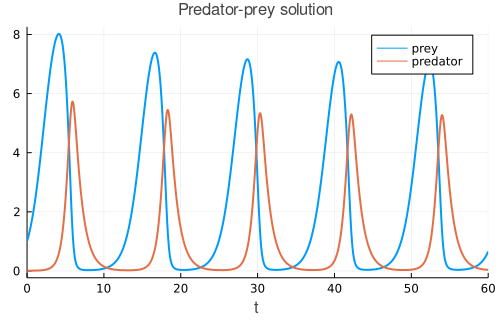

In [4]:
sol = solve(ivp,Tsit5());
plot(sol,label=["prey" "predator"],title="Predator-prey solution")

We can find the discrete values used to compute the interpolated solution. The `sol.u` value is a vector of vectors.

In [5]:
t,u = sol.t,sol.u    # extract times and solution values
@show size(u);
@show t[20];
@show u[20];

size(u) = (100,)
t[20] = 8.386698813683195
u[20] = [0.027739197994334695, 0.6994178264709752]


We can also use {numref}`Function {number} <function-euler>` to find the solution.

In [6]:
t,u = FNC.euler(ivp,1200);

The solution `u` is a vector of [prey,predator] 2-vectors for each of the discrete times in `t`. Manipulating the vector-of-vectors output can be a little tricky. Here, we convert it to an $n\times 2$ matrix. Each column is one component, while each row is a single value of $t$.

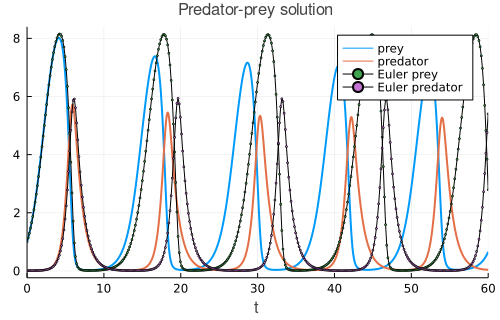

In [7]:
u = [ u[j] for u in u, j in 1:2 ]
plot!(t[1:3:end],u[1:3:end,:],l=(1,:black),m=2,
    label=["Euler prey" "Euler predator"])

Notice above that the accuracy of the Euler solution deteriorates rapidly. 

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
When there are just two components, it's common to plot the solution in the _phase plane_, i.e., with $u_1$ and $u_2$ along the axes and time as a parameterization of the curve.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
You can use `vars` in the plot of a solution produced by `solve` to specify the components of the solution that appear on each axis.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

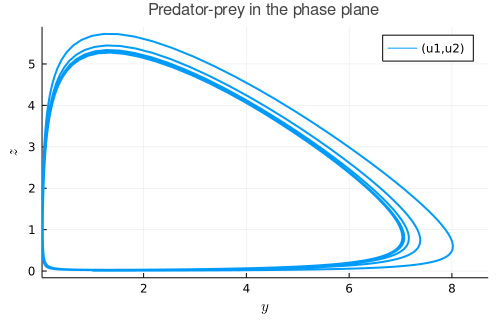

In [8]:
plot(sol,vars=(1,2),title="Predator-prey in the phase plane",
    xlabel=L"y",ylabel=L"z")

From this plot we can deduce that the solution approaches a periodic one, which in the phase plane is represented by a closed loop.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

In the rest of this chapter we present methods as though they are for scalar equations, but their application to systems is taken for granted. The generalization of error analysis can be more complicated, but our statements about order of accuracy and other properties are true for systems as well as scalars. The codes are all written to accept systems.

## Transformation of high-order systems

Fortunately, the ability to solve first-order ODE systems implies the ability to solve systems of higher differential order, too. The reason is that there is a systematic way to turn a higher-order problem into a first-order one of higher dimension.

(example-nlosc3)=

````{proof:example}
 Consider the nonlinear initial-value problem
  
```{math}
  y''+(1+y')^3 y = 0, \qquad y(0)= y_0, \quad y'(0) = 0.
```

In order to write this problem as a first-order system we define two scalar unknown functions, $u_1 = y$ and $u_2 = y'$. With these definitions, we have the two differential equations

```{math}
\begin{split}
  u_1' &= u_2, \\
  u_2' &= -(1+u_2)^3 u_1,
\end{split}
```

which is a first-order system in two dimensions. The initial
condition of the system is

```{math}
  u_1(0) = y_0, \quad u_2(0) = 0.
```
````

(example-systems-coupledpendula)=
````{proof:example}
Two identical pendulums suspended from the same rod and swinging in parallel planes can be modeled as the second-order system

```{math}
\begin{split}
  \theta_1''(t) +\gamma \theta_1' + \frac{g}{L} \sin \theta_1 +
  k(\theta_1-\theta_2) &= 0,\\
  \theta_2''(t) +\gamma \theta_2' + \frac{g}{L} \sin \theta_2 +
  k(\theta_2-\theta_1) &= 0,
\end{split}
```

where $\theta_1$ and $\theta_2$ are angles made by the two pendulums, $L$ is the length of each pendulum, $\gamma$ is a frictional parameter, and $k$ is a parameter describing a torque produced by the rod when it is twisted. We can convert this problem into a first-order system using the substitutions

```{math}
  u_1 = \theta_1, \quad u_2 = \theta_2, \quad u_3 = \theta_1', \quad
  u_4 = \theta_2'.
```

With these definitions the system becomes

```{math}
\begin{split}
  u_1' &= u_3, \\
  u_2' &= u_4, \\
  u_3' &= -\gamma u_3 - \frac{g}{L}\sin u_1 + k(u_2-u_1), \\
  u_4' &= -\gamma u_4 - \frac{g}{L}\sin u_2 + k(u_1-u_2),
\end{split}
```

which is a first-order system in four dimensions. To complete the description of the problem, you need to specify values for $\theta_1(0)$, $\theta_1'(0)$, $\theta_2(0)$, and $\theta_2'(0)$.
````

The trick illustrated in the preceding examples is always available. Suppose $y$ is a scalar dependent variable in the system. You should introduce a component of $\mathbf{u}$ for $y$, $y'$, etc., up to but not including the highest derivative appearing anywhere for $y$. This is done for each scalar variable in the original system. There should be one component of $\mathbf{u}$ for each scalar initial condition given. Many equations for the first-order system then come from the trivial relationships among all the lower derivatives. The remaining equations for the system come from the original, high-order equations. In the end, there must be as many scalar component equations as unknown first-order variables.

(demo-systems-coupledpendula)=
```{proof:demo}
```
```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
Let's implement the coupled pendulums from {numref}`Example {number} <example-systems-coupledpendula>`. The pendulums will be pulled in opposite directions and then released together from rest.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
The `similar` function creates an array of the same size and type as a given value, without initializing the contents.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [9]:
function couple(u,p,t)
    γ,L,k = p
    g = 9.8
    udot = similar(u)
    udot[1:2] .= u[3:4]
    udot[3] = - γ*u[3] - (g/L)*sin(u[1]) + k*(u[2]-u[1])
    udot[4] = - γ*u[4] - (g/L)*sin(u[2]) + k*(u[1]-u[2])
    return udot 
end

u₀ = [1.25,-0.5,0,0]
tspan = (0.,50.);

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
First we check the behavior of the system when the pendulums are uncoupled, i.e., when $k=0$.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
Here `vars` is used to plot two components as functions of time.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

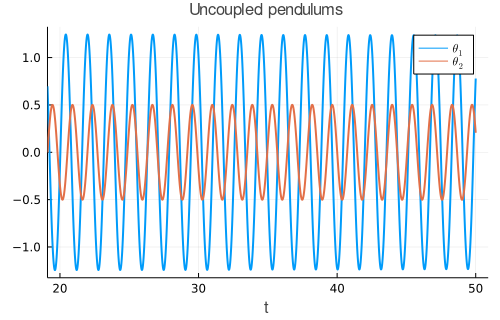

In [10]:
γ,L,k = 0,0.5,0
ivp = ODEProblem(couple,u₀,tspan,[γ,L,k])
sol = solve(ivp,Tsit5())
plot(sol,vars=[1,2],label=[L"\theta_1" L"\theta_2"],
    xlims=[20,50],title="Uncoupled pendulums")

You can see that the pendulums swing independently. Because the model is nonlinear and the initial angles are not small, they have slightly different periods of oscillation, and they go in and out of phase.

With coupling activated, a different behavior is seen.

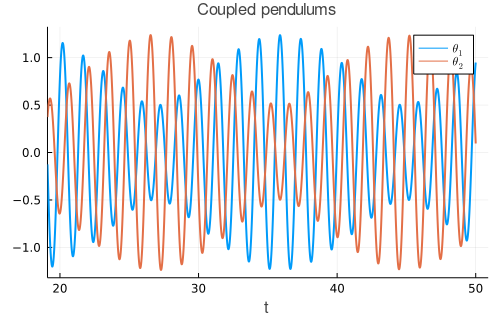

In [11]:
k = 1
ivp = ODEProblem(couple,u₀,tspan,[γ,L,k])
sol = solve(ivp,Tsit5())
plot(sol,vars=[1,2],label=[L"\theta_1" L"\theta_2"],
    xlims=[20,50],title="Coupled pendulums")

The coupling makes the pendulums swap energy back and forth. 

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Exercises

1. ✍ Rewrite the given higher order problems as first-order systems.

    **(a)** $y'''-3y''+3 y' -y = t, \: y(0) = 1, \: y'(0) = 2, \: y''(0) = 3$

    **(b)** $y'' + 4 (x^2-1)y' + y = 0, \: y(0) = 2, \: y'(0) = -1$

    **(c)** For a given constant $a$,

    ```{math}
    \begin{split}
      x'' + \frac{a x}{(x^2+y^2)^{3/2}} &= 0,\\
      y'' + \frac{a y}{(x^2+y^2)^{3/2}} &= 0,
      \end{split}
    ```

    with initial values $x(0) = 1$, $x'(0)=y(0) = 0$, $y'(0)=3$

    **(d)** $y^{(4)} -y = e^{-t}, \: y(0) = 0, \: y'(0) = 0, \: y''(0) = 1,\: y'''(0) = 0$

    **(e)** $y'''-y''+y'-y = t, \: y(0) = 1, \: y'(0) = 2, \: y''(0) = 3$

2. ✍ Write the given IVP as a system. Then do two steps of Euler's method by hand (perhaps with a calculator) with the indicated step size $h$. Using the given exact solution, compute the error after the second step.

    **(a)** $y''+ 4y = 4t, \: y(0) = 1,\: y'(0) = 1; \: \hat{y}(t) = t+\cos (2t),\: h=0.1$

    **(b)** $y''- 4y = 4t, \: y(0) = 2,\: y'(0) = -1; \: \hat{y}(t) = e^{2t} + e^{-2t}-t,\: h=0.1$

    **(c)** $2 x^2 y'' +3xy' - y = 0, \: y(2) = 1, \: y'(2) = -1/2,  \: \hat{y}(x) = 2/x, h = 1/8$

    **(d)** $2 x^2 y'' +3xy' - y = 0,\: y(1) = 4, \: y'(1) = -1, \: \hat{y}(x) = 2(x^{1/2} + x^{-1}), h=1/4$

3. ⌨ Solve the following IVPs using {numref}`Function {number} <function-euler>` using $n=1000$ steps. Plot the solution and its first derivative together on one plot, and plot the error in each component as functions of time on another.

    **(a)** $y''+ 4y = 4t, \: 0< t< 2\pi, \: y(0) = 1,\: y'(0) = 1; \: \hat{y}(t) = t+\cos (2t)$

    **(b)** $y''+ 9y = \sin(2t), \: 0< t< 2\pi, \: y(0) = 2,\: y'(0) = 1$; $\quad \hat{y}(t) = (1/5) \sin(3t) + 2 \cos (3t)+  (1/5) \sin (2t)$

    **(c)** $y''- 4y = 4t \: 0< t< 1.5, \: y(0) = 2,\: y'(0) = -1; \: \hat{y}(t) = e^{2t} + e^{-2t}-t$

    **(d)** $y''+ 4y'+ 4y = t, \: 0< t< 4, \: y(0) = 1,\: y'(0) = 3/4; \: \hat{y}(t) = (3t+5/4)e^{-2t} + (t-1)/4$

    **(e)** $x^2 y'' +5xy' + 4y = 0,\: 1<x<e^2, \: y(1) = 0, \: y'(1) = 2, \: \hat{y}(x) = (2/x^2) \ln x$

    **(f)** $x^2 y'' +5xy' + 4y = 0,\: 1<x<e^2, \: y(1) = 1, \: y'(1) = -1, \: \hat{y}(x) = x^{-2}( 1 + \ln x)$

    **(g)** $2 x^2 y'' +3xy' - y = 0,\: 2<x<20, \: y(2) = 1, \: y'(2) = -1/2, \: \hat{y}(x) = 2/x$

    **(h)** $2 x^2 y'' +3xy' - y = 0,\: 1<x<16, \: y(1) = 4, \: y'(1) = -1, \: \hat{y}(x) = 2(x^{1/2} + x^{-1})$

    **(i)** $x^2 y'' -xy' + 2y = 0,\: 1<x<e^{\pi}, \: y(1) = 3, \: y'(1) = 4$; $\quad \hat{y}(x) = x \left[ 3 \cos \left( \ln x \right)+\sin \left( \ln x \right) \right]$

    **(j)** $x^2 y'' + 3xy' + 4y = 0,\: e^{\pi/12} < x < e^{\pi}, \: y(e^{\pi/12}) = 0,  \: y'(e^{\pi/12}) = -6$; $\quad \hat{y}(x) = x^{-1} \left[ 3 \cos \left( 3 \ln x \right)+\sin \left( 3 \ln x \right) \right]$

    (problem-SIR)=
4. ⌨ A disease that is endemic to a population can be modeled by tracking the fraction of the population that is susceptible to infection, $v(t)$, and the fraction that is infectious, $w(t)$. (The rest of the population is considered to be recovered and immune.) A typical model is the *SIR model* (see {cite}`brittonEssentialMathematical2003`)

    ```{math}
    \frac{dv}{dt} = 0.2(1-v) - 3vw, \qquad \frac{dw}{dt} = (3v-1)w.
    ```

    Starting with $v(0) = 0.95$ and $w(0) = 0.05$, use `solve` to find the long-term steady values of $v(t)$ and $w(t)$. Plot both components of the solution as functions of time.

5. ⌨ In each case below, use `solve` to solve the given ODE for $0\le t \le 10$ with the given initial conditions. Plot the results together as curves in the phase plane (that is, with $x$ and $y$ as the axes of the plot), using `aspect_ratio=1` in the plot command.

    **(a)** 

    ```{math}
    \begin{split}
      x'(t) & = - 4y + x(1-x^2-y^2),\\
      y'(t) & = 4x + y(1-x^2-y^2),
    \end{split}
    ```

    with $[x(0),y(0)]=[0.1,0]$ and $[x(0),y(0)]=[0,1.9]$.

    **(b)** 

    ```{math}
    \begin{split}
      x'(t) & = - 4y - \tfrac{1}{4}x(1-x^2-y^2)(4-x^2-y^2),\\
      y'(t) & = 4x - \tfrac{1}{4}y(1-x^2-y^2)(4-x^2-y^2),
    \end{split}
    ```

    with $[x(0),y(0)]=[0.95,0]$, $[0,1.05]$, and $[-2.5,0]$.

    (problem-systems-fitznag)=
6. ⌨ The **FitzHugh–Nagumo equations** are a simple model of the repeated firing of a neuron. They are given by

    ```{math}
    \begin{split}
    \frac{d v_1}{dt} &= - v_1(v_1-1)(v_1-a) - v_2 + I, \\
    \frac{d v_2}{dt} &= \epsilon ( v_1 - \gamma v_2).
    \end{split}
    ```

    Assume $v_1(0) = 0.5$, $v_2(0) = 0.1$, $a = 0.1$, $\epsilon = 0.008$, $\gamma = 1$. For each value of $I$ below, find and plot the solution using `solve` for $0\le t \le 600$. The solutions are highly sensitive to $I$, and you need to change the requested absolute and relative error tolerances to $10^{-9}$. In each case the solution quickly approaches a periodic oscillation.

    **(a)** $I = 0.05527,\quad$
    **(b)** $I = 0.05683,\quad$
    **(c)** $I = 0.0568385,\quad$
    **(d)** $I = 0.05740$.

    This exploration was carried out by Baer and Erneux {cite}`baerSingularHopf1986`.